In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(reshape2))
defaultW <- getOption("warn")
options(warn = -1)
options(repr.plot.width=12, repr.plot.height=8)

library(tidyverse)
library(ggplot2)
library(KernSmooth)

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



# Ejercicio 1

Los datos del fichero *Datos-geyser.txt* corresponden al día de la observación (primera
columna), el tiempo medido en minutos (segunda columna Y ) y el tiempo hasta la siguiente
erupción (tercera columna X) del geyser *Old-Faithful* en el parque norteamericano de
*Yellowstone*.

a) Representa gráficamente los datos, junto con el estimador de Nadaraya-Watson de la
función de regresión de Y sobre X.

b) Representa gráficamente los datos, junto con el estimador localmente lineal de la función
de regresión de Y sobre X.

Comenzamos leyendo los datos del conjunto de datos especificado, quedádonos con las columnas que nos interesan para el análisis.

In [2]:
df <- data.frame(read.table("Datos-geyser.txt", header = TRUE))[, c("X","Y")]
n <- nrow(df)
head(df)

,X,Y
,<dbl>,<int>
1,4.4,78
2,3.9,74
3,4.0,68
4,4.0,76
5,3.5,80
6,4.1,84


Estamos preparados para dibujar el **apartado a**. Usamos la función `geom_smooth` pasándole como parámetro `method = loess` y parámetros del método `degree = 0`, que nos dará el estimador de Nadayara-Watson de los datos.

`geom_smooth()` using formula 'y ~ x'



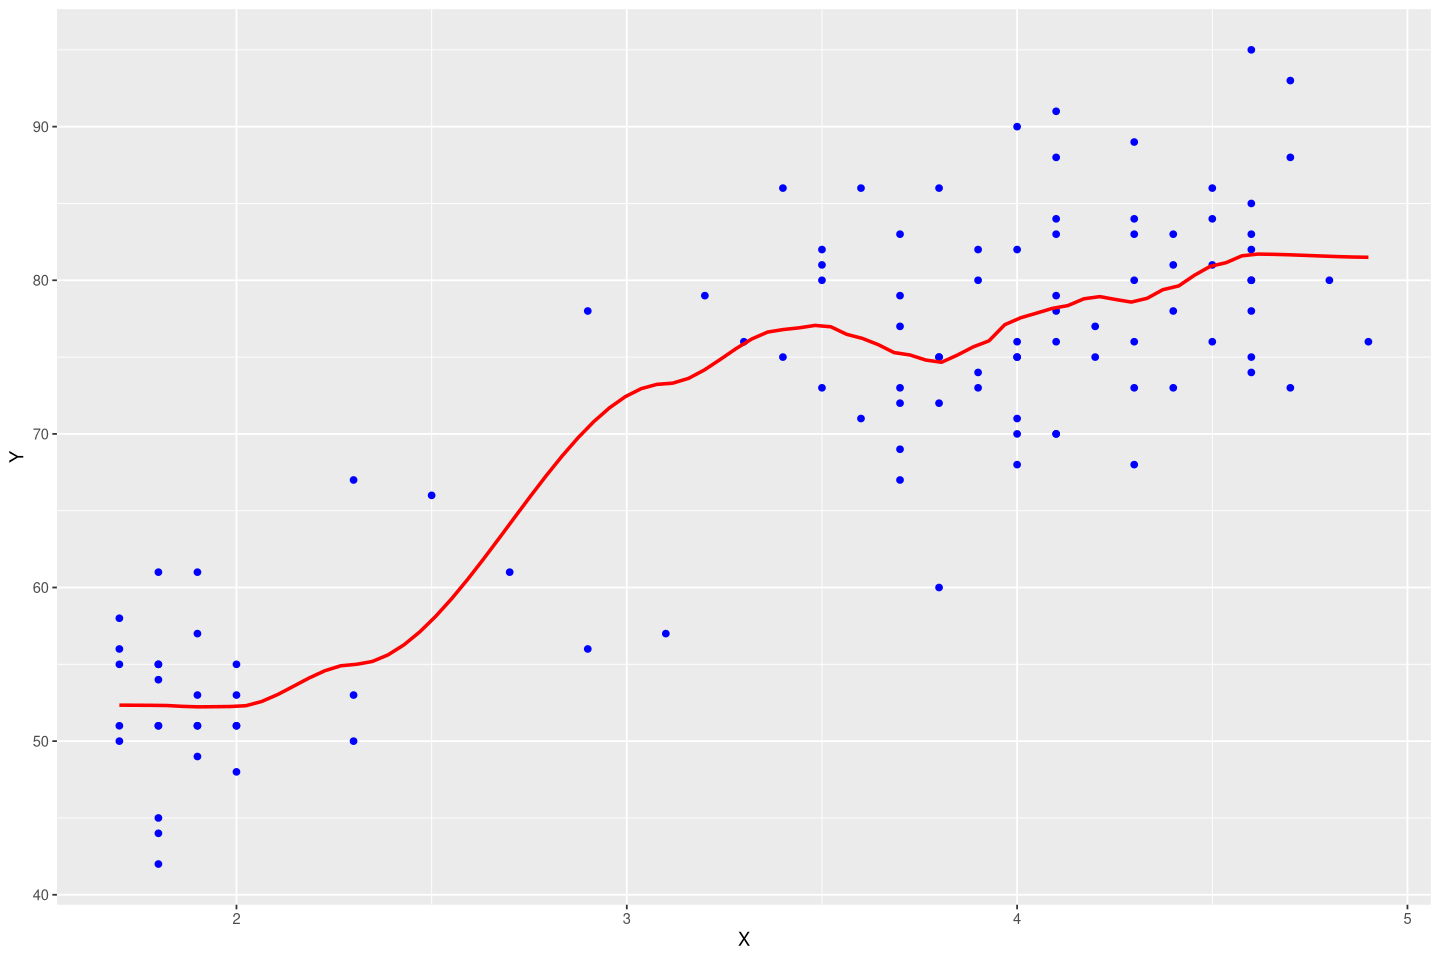

In [3]:
ggplot(df,aes(X,Y)) +
    geom_point(color = "blue")+
    geom_smooth( method = 'loess', se = FALSE, span = 0.25, method.args = list(degree=0), col = 'red')



A continuación, queremos hacer para el **apartado b** el estimador localmente lineal. Debemos volver a usar la función `geom_smooth` con `method = loess`, pero ahora le damos como parámetro a este método `degree = 1`, para obtener el estimador localmente lineal.

`geom_smooth()` using formula 'y ~ x'



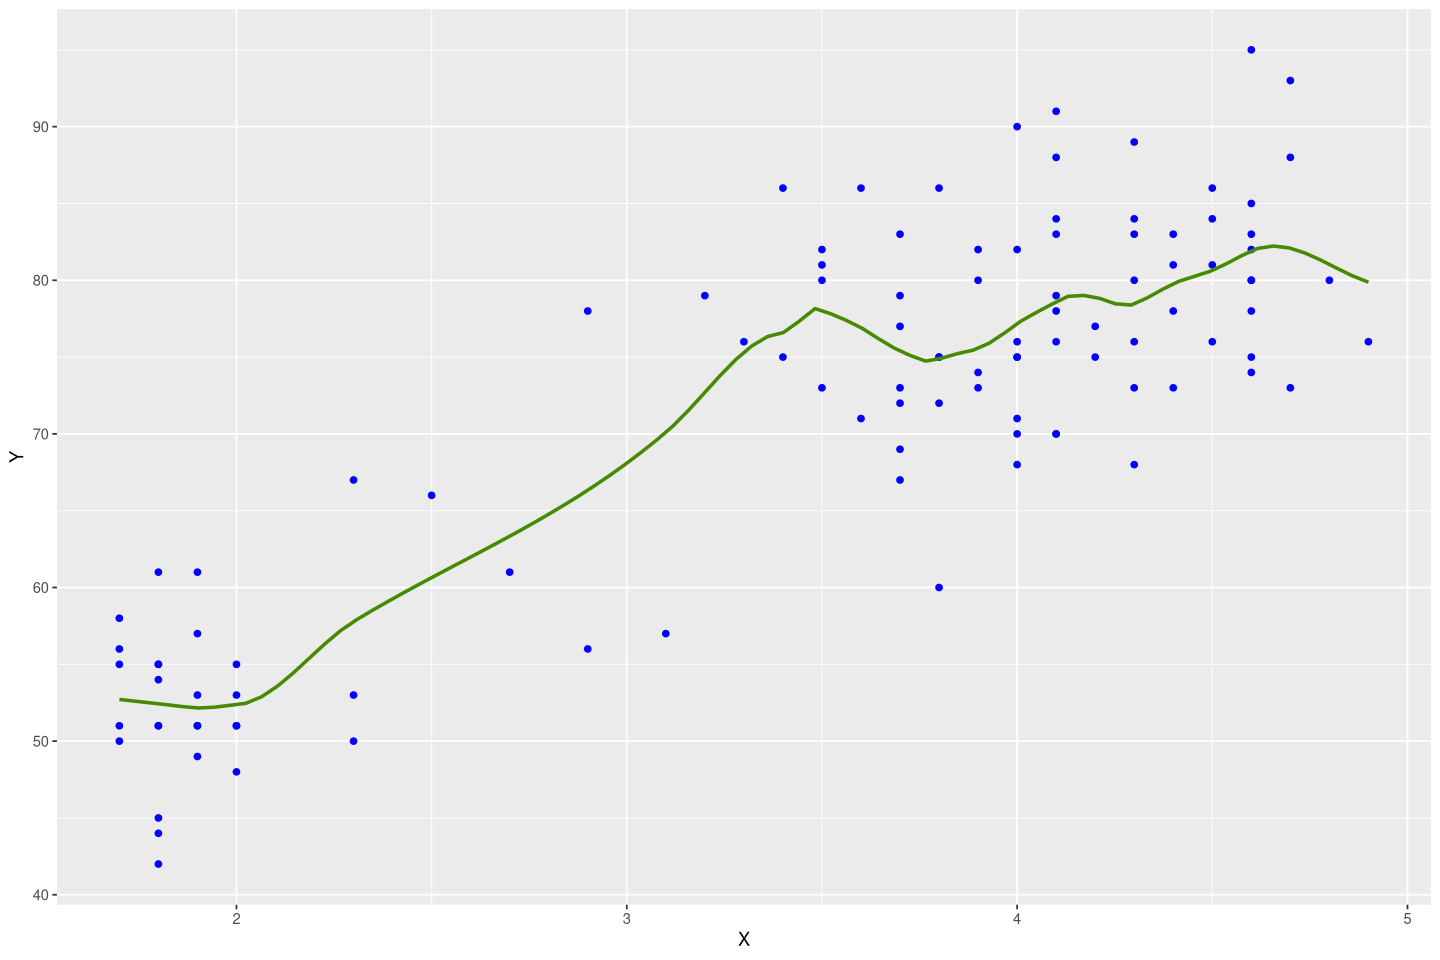

In [4]:
ggplot(df,aes(X,Y)) +
    geom_point(color = "blue")+
    geom_smooth( method = 'loess', se = FALSE, span = 0.25, method.args = list(degree=1), col = 'chartreuse4')

Con objeto de comparar ambos estimadores, vamos a dibujar los dos en el mismo gráfico para observar sus diferencias:

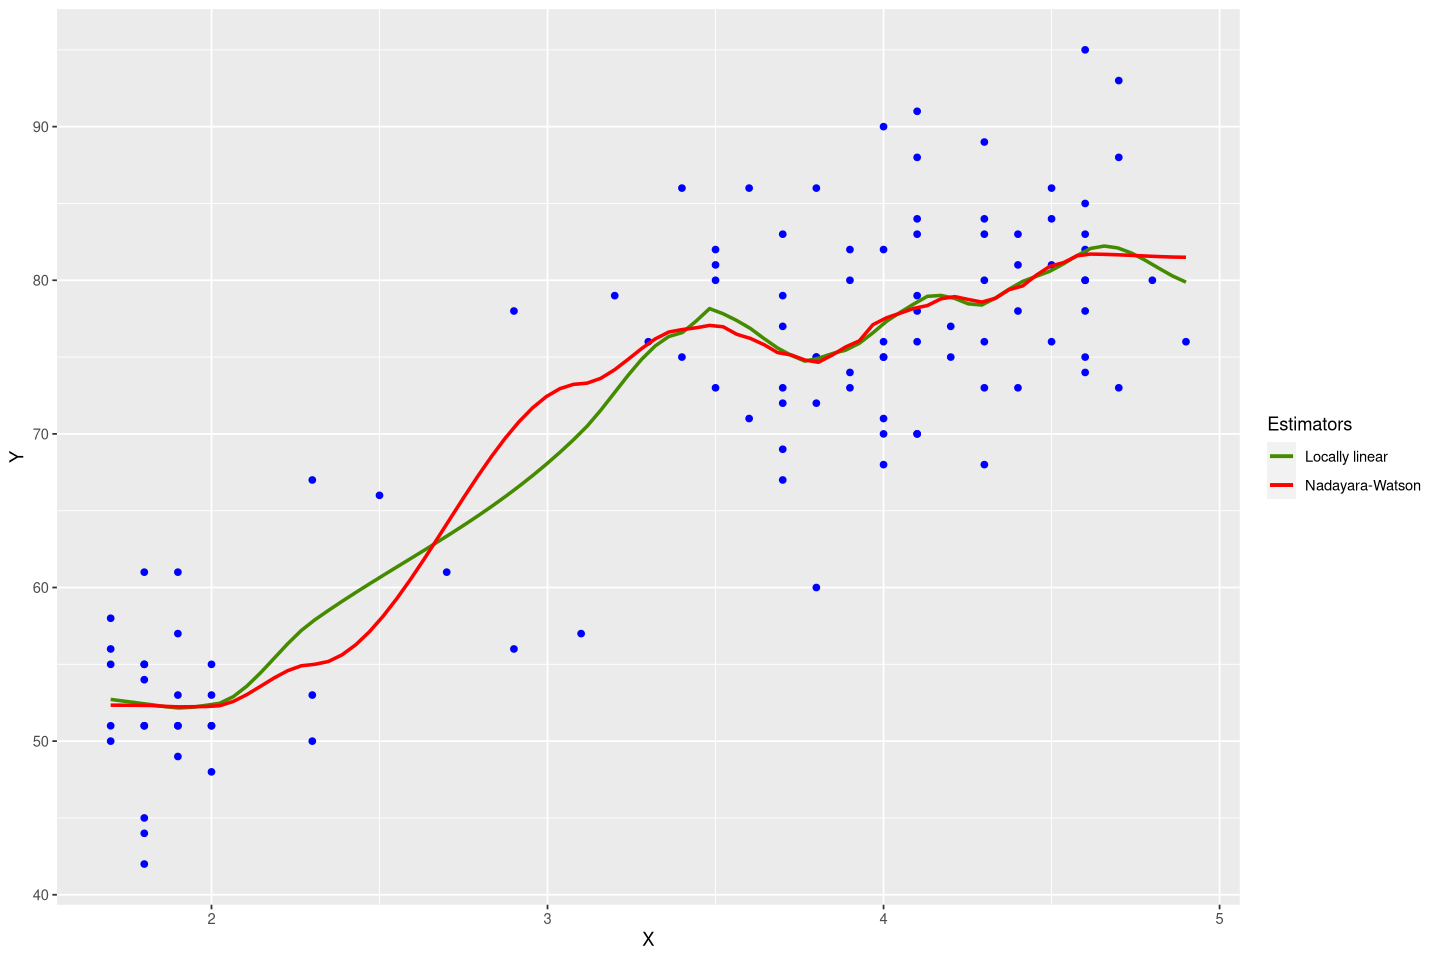

In [5]:
ggplot(df,aes(X,Y)) +
    geom_point(color = "blue")+
    geom_smooth(aes(colour="Locally linear"),formula=y~x, method = 'loess', se = FALSE, span = 0.25, method.args = list(degree=1))+
    geom_smooth(aes(colour="Nadayara-Watson"),formula=y~x,  method = 'loess', se = FALSE, span = 0.25, method.args = list(degree=0))+
    scale_color_manual(name = "Estimators", values = c('chartreuse4','red'))